In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [4]:
pd.DataFrame(x)

,0,1
0,-1.777242,-1.121393
1,-0.068341,-2.026053
2,0.694277,0.819718
3,0.130140,1.717501
4,0.575905,1.723415
...,...,...
995,1.060062,-1.229890
996,0.960685,-0.618702
997,-0.047250,0.572770
998,0.420085,-2.057593


In [5]:
pd.DataFrame(y)

,0
0,-59.491134
1,-110.997353
2,47.528925
3,90.722381
4,95.927414
...,...
995,-65.338855
996,-38.208903
997,31.871227
998,-120.157389


<Axes: xlabel='0', ylabel='1'>

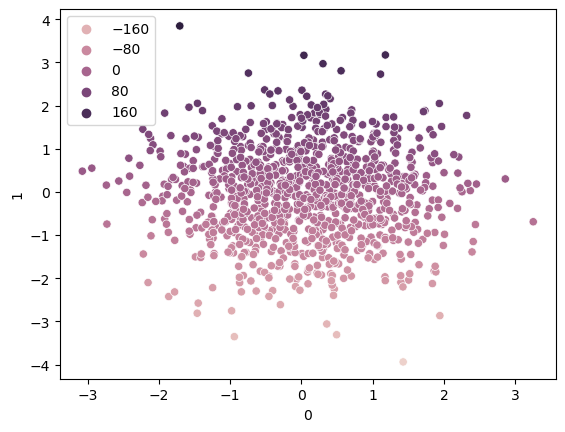

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=21)

In [8]:
from sklearn.svm import SVR

In [9]:
svc=SVR(kernel='linear')

In [10]:
svc.fit(x_train,y_train)

SVR(kernel='linear')

In [11]:
y_pred=svc.predict(x_test)

In [12]:
y_pred

array([  49.20533565,    8.31781421,   86.38005849,   35.27102508,
         40.79298725,   -4.54848585,   -1.19426872,  -38.18160754,
        -39.06137283,  -40.68884117,   52.98953326,  151.1641011 ,
         38.80446197,   48.94736636,  -31.85627284,  -17.87887167,
         23.74129563,   64.04187195,   51.31678012,   53.3600426 ,
         48.83077359,   -3.9284961 ,  -72.60979036,  -62.0606358 ,
         77.44989027,   10.99678034,   33.90741777,    9.06449533,
        -71.99515016,  -23.12542828,   39.4181361 ,    9.61043791,
        -54.04012795,   24.17679412,   41.13030559,   26.72536897,
        -48.03976192,   89.79986726,   -8.52965988,    9.76164504,
        -47.79983396,  -34.18670201,  -49.5445636 ,  -68.80298215,
        -42.72644769,  -14.39355022,   42.88105867,  -70.19197884,
        -27.14232056,    0.66750957,  -54.2438236 ,  -34.5303534 ,
         80.07274088,   -4.21010484, -106.89982854,    7.48088367,
         -2.20407685,   31.29015442,   95.13188691,   19.77083

In [13]:
svc.coef_

array([[-0.14912633, 54.81704151]])

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score

In [15]:
r2_score(y_pred,y_test)

0.9968152019363546

# Hyperparametere tuning with SVC

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameter={'kernel':('linear','rbf'),'C':[0,1,10,20,100]
          ,'gamma':[1,.1,.01,.001,.0001],'epsilon':[.1,.2,.3]}

In [29]:
gs=GridSearchCV(svc,parameter,refit=True,cv=5,verbose=3,scoring='neg_mean_squared_error')

In [30]:
gs

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0, 1, 10, 20, 100], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
gs_=gs.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END C=0, epsilon=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END C=0, epsilon=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END C=0, epsilon=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END C=0, epsilon=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END C=0, epsilon=0.1, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END C=0, epsilon=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END C=0, epsilon=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END C=0, epsilon=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END C=0, epsilon=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END C=0, epsilon=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END C=0, epsilon=0.1, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END C=

[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-8.980 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-9.827 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-8.480 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-8.749 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-8.320 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-223.029 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-381.509 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-203.318 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-280.313 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-629.715 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.01, kernel=linear;, score=-8.980 total time=   0.0s
[CV 2/5] END C

[CV 4/5] END C=1, epsilon=0.3, gamma=1, kernel=rbf;, score=-957.801 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.3, gamma=1, kernel=rbf;, score=-1804.422 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.3, gamma=0.1, kernel=linear;, score=-8.975 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.3, gamma=0.1, kernel=linear;, score=-9.819 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.3, gamma=0.1, kernel=linear;, score=-8.490 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.3, gamma=0.1, kernel=linear;, score=-8.758 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.3, gamma=0.1, kernel=linear;, score=-8.319 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.3, gamma=0.1, kernel=rbf;, score=-221.438 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.3, gamma=0.1, kernel=rbf;, score=-382.147 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.3, gamma=0.1, kernel=rbf;, score=-203.269 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.3, gamma=0.1, kernel=rbf;, score=-280.888 total time=   0.0s
[CV 5/5] END C=1, e

[CV 4/5] END C=10, epsilon=0.2, gamma=1, kernel=linear;, score=-8.616 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=1, kernel=linear;, score=-8.176 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=1, kernel=rbf;, score=-98.606 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=1, kernel=rbf;, score=-382.019 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=1, kernel=rbf;, score=-147.217 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=1, kernel=rbf;, score=-314.409 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=1, kernel=rbf;, score=-822.222 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-8.987 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-9.742 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-8.546 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-8.616 total time=   0.0s
[CV 5/5] END C=10, 

[CV 5/5] END C=10, epsilon=0.3, gamma=0.0001, kernel=rbf;, score=-4056.029 total time=   0.0s
[CV 1/5] END C=20, epsilon=0.1, gamma=1, kernel=linear;, score=-9.012 total time=   0.0s
[CV 2/5] END C=20, epsilon=0.1, gamma=1, kernel=linear;, score=-9.740 total time=   0.0s
[CV 3/5] END C=20, epsilon=0.1, gamma=1, kernel=linear;, score=-8.564 total time=   0.0s
[CV 4/5] END C=20, epsilon=0.1, gamma=1, kernel=linear;, score=-8.614 total time=   0.0s
[CV 5/5] END C=20, epsilon=0.1, gamma=1, kernel=linear;, score=-8.166 total time=   0.0s
[CV 1/5] END C=20, epsilon=0.1, gamma=1, kernel=rbf;, score=-31.534 total time=   0.0s
[CV 2/5] END C=20, epsilon=0.1, gamma=1, kernel=rbf;, score=-308.005 total time=   0.0s
[CV 3/5] END C=20, epsilon=0.1, gamma=1, kernel=rbf;, score=-98.407 total time=   0.0s
[CV 4/5] END C=20, epsilon=0.1, gamma=1, kernel=rbf;, score=-220.860 total time=   0.0s
[CV 5/5] END C=20, epsilon=0.1, gamma=1, kernel=rbf;, score=-645.043 total time=   0.0s
[CV 1/5] END C=20, epsi

[CV 5/5] END C=20, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-8.167 total time=   0.0s
[CV 1/5] END C=20, epsilon=0.2, gamma=0.0001, kernel=rbf;, score=-3142.693 total time=   0.0s
[CV 2/5] END C=20, epsilon=0.2, gamma=0.0001, kernel=rbf;, score=-3323.920 total time=   0.0s
[CV 3/5] END C=20, epsilon=0.2, gamma=0.0001, kernel=rbf;, score=-2869.147 total time=   0.0s
[CV 4/5] END C=20, epsilon=0.2, gamma=0.0001, kernel=rbf;, score=-2913.048 total time=   0.0s
[CV 5/5] END C=20, epsilon=0.2, gamma=0.0001, kernel=rbf;, score=-3898.511 total time=   0.0s
[CV 1/5] END C=20, epsilon=0.3, gamma=1, kernel=linear;, score=-8.979 total time=   0.0s
[CV 2/5] END C=20, epsilon=0.3, gamma=1, kernel=linear;, score=-9.733 total time=   0.0s
[CV 3/5] END C=20, epsilon=0.3, gamma=1, kernel=linear;, score=-8.564 total time=   0.0s
[CV 4/5] END C=20, epsilon=0.3, gamma=1, kernel=linear;, score=-8.614 total time=   0.0s
[CV 5/5] END C=20, epsilon=0.3, gamma=1, kernel=linear;, score=-8.172 total time

[CV 1/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.011 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.740 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.572 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.608 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.159 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-2189.818 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-2318.449 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-1982.882 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-2023.888 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-2751.593 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.2, gamma=1, kernel=l

[CV 2/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=-9.732 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=-8.583 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=-8.612 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=-8.168 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=rbf;, score=-11.325 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.001, kernel=rbf;, score=-13.194 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.001, kernel=rbf;, score=-10.081 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.001, kernel=rbf;, score=-11.619 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.001, kernel=rbf;, score=-13.911 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-8.986 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.0001, kernel=linear;, score=

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constr

In [32]:
gs_.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [33]:
gs.best_score_

-8.80960106469576

In [34]:
gs.best_estimator_

SVR(C=100, epsilon=0.2, gamma=1, kernel='linear')

In [35]:
gs.best_index_

130

In [36]:
y_pred=gs.predict(x_test)

In [37]:
r2_score(y_pred,y_test)

0.9968622362222392